In [1]:
import tensorflow as tf
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # -1  to USE CPU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from PIL import Image
from keras import Sequential,models,layers
import cv2
#import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir
import scipy
import glob

get_ipython().magic(u'matplotlib inline')

In [3]:
#Get the path of files
img_dir='C:/Users/kiptanui/Downloads/Compressed/MRI Dataset/brain_tumor_dataset/'
no_images=os.listdir(img_dir + 'no/')
yes_images=os.listdir(img_dir + 'yes/')

In [4]:
no_images

In [5]:
#initialize dataset and label arrays
datset=[]
lab=[]

In [7]:
#loop over each image in each category

#for images labelled with no
for image_name in no_images:
    image=cv2.imread(img_dir + 'no/' +image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    datset.append(np.array(image))
    lab.append(0)
    
#for images labelled with yes
for image_name in yes_images:
    image=cv2.imread(img_dir + 'yes/' +image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    datset.append(np.array(image))
    lab.append(1)
    
#convert dataset and label to numpy to array    
data=np.asarray(datset)
l=np.asarray(lab)

#convert dataset and label to numpy to array    
data=np.asarray(datset)
l=np.asarray(lab)

In [8]:
print(data.shape, l.shape)

(253, 64, 64, 3) (253,)


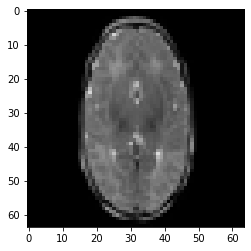

In [9]:
plt.imshow(data[3])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,l,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)

(202, 64, 64, 3)
(202,)


Model Training

In [12]:
model=Sequential([
                     
                     #cnn
                    layers.Conv2D(50,(3,3),activation="relu",input_shape=(64,64,3)),
                    layers.MaxPooling2D((2,2)),
     
                    layers.Conv2D(64,(3,3),activation="relu"),
                    layers.MaxPooling2D((2,2)),
    
                    layers.Conv2D(54,(3,3),activation="relu"),
                    layers.MaxPooling2D((2,2)),
    
                     #dense_layer
                     layers.Flatten(),
                     layers.Dense(64,activation="relu"),
                     layers.Dense(2,activation="softmax")

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        28864     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 54)        31158     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 54)         0

In [16]:
tf.keras.utils.plot_model(model,to_file="model.png",
                          show_shapes=True,
                          expand_nested=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=30)

Epoch 1/30
7/7 [==============================] - 3s 93ms/step - loss: 15.7015 - accuracy: 0.5495
Epoch 2/30
7/7 [==============================] - 1s 102ms/step - loss: 2.4843 - accuracy: 0.6436
Epoch 3/30
7/7 [==============================] - 1s 101ms/step - loss: 1.8539 - accuracy: 0.6238
Epoch 4/30
7/7 [==============================] - 1s 102ms/step - loss: 0.6490 - accuracy: 0.7277
Epoch 5/30
7/7 [==============================] - 1s 103ms/step - loss: 0.4925 - accuracy: 0.7772
Epoch 6/30
7/7 [==============================] - 1s 102ms/step - loss: 0.3922 - accuracy: 0.8119
Epoch 7/30
7/7 [==============================] - 1s 109ms/step - loss: 0.3474 - accuracy: 0.8366
Epoch 8/30
7/7 [==============================] - 1s 101ms/step - loss: 0.3188 - accuracy: 0.8762
Epoch 9/30
7/7 [==============================] - 1s 101ms/step - loss: 0.2964 - accuracy: 0.8762
Epoch 10/30
7/7 [==============================] - 1s 103ms/step - loss: 0.2477 - accuracy: 0.9010
Epoch 11/30
7/7 [==

Preparing images for prediction

In [19]:
pred_set=[]
pred_dir = 'C:/Users/kiptanui/Downloads/Compressed/MRI Dataset/'
pred_images=os.listdir(pred_dir +'pred/')
for image_name in pred_images:    
    image=cv2.imread(img_dir +'pred/'+ image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    pred_set.append(np.array(image))
pred=np.asarray(pred_set)

AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [16]:
prediction=model.predict(X_test)
prediction=np.argmax(prediction,axis=1)

2/2 [==============================] - 0s 21ms/step


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction,y_test)

0.8627450980392157

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Prepare/collect data

In [2]:
import os

path = os.listdir('C:/Users/kiptanui/Downloads/Compressed/MRI Dataset/brain_tumor_dataset/')
classes = {'no':0, 'yes':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/kiptanui/Downloads/Compressed/MRI Dataset/brain_tumor_dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

1    155
0     98
dtype: int64

In [7]:
X.shape, X_updated.shape

((253, 200, 200), (253, 40000))

Visualize data

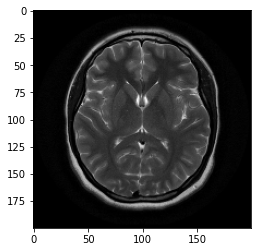

In [8]:
plt.imshow(X[0], cmap='gray')

Split Data

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=47,
                                               test_size=0.2)

In [10]:
xtrain.shape, xtest.shape

((202, 40000), (51, 40000))

Feature Scaling

In [11]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Feature Selection: PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(202, 40000) (51, 40000)


Train Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [17]:
#fit RandomforestClassifier model on train data
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
print(metrics.classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.81      0.91      0.86        23

    accuracy                           0.86        51
   macro avg       0.86      0.87      0.86        51
weighted avg       0.87      0.86      0.86        51



In [18]:
print(preds)

[0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1
 1 0 0 1 0 0 1 0 1 0 0 1 1 1]
